##Abstractive Text Summarization for Covid-19 papers
In this notebook, we have used different transformer models to carry out abstractive text summarization on articles related to Covid-19. The models are as follows:


1.   T5 (' Text-to-Text Transfer Transformer ')
2.   BART (' Bidirectional and Auto-Regressive Transformer ')

1.   PEGASUS ('Pre-training with Extracted Gap-sentences for Abstractive SUmmarization Sequence-to-sequence models')
2.   PEGASUS_COVID19 (PEGASUS model finetuned on CORD-19 dataset available on Huggingface datasets) 








####Installation of libraries

In [1]:
!pip install tensorflow
!pip install torch
!pip install transformers
!pip install sentencepiece

     |████████████████████████████████| 3.1 MB 11.8 MB/s 
     |████████████████████████████████| 895 kB 62.1 MB/s 
     |████████████████████████████████| 3.3 MB 59.7 MB/s 
     |████████████████████████████████| 59 kB 6.7 MB/s 
     |████████████████████████████████| 596 kB 82.7 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
     |████████████████████████████████| 1.2 MB 15.1 MB/s 


In [2]:
#INPUT TEXT
input_text ="""
Introduction
The novel coronavirus pneumonia (COVID-19) 1 initially appeared in Wuhan, China is caused by severe acute respiratory syndrome coronavirus 2 (SARS-CoV-2). WHO announced that the ongoing COVID-19 outbreak is a Public Health Emergency of International Concern (PHEIC) [2] [3] [4] . As of Mar. 10, 2020, the number of confirmed COVID-19 cases in China has reached to 80955, of which 3162 were dead, and 61567 were cured.Wuhan City and its affiliated Hubei Province are most affected and account for at least 90% of the cases. At present the outbreak in China has been basically controlled. However, the cases of COVID-19 have rapidly increased in other 109 countries around the world, such as South Korea, Italy, Iran, Japan, Singapore, United States and so on. As of Mar 10, 2020, the total number of patients has risen sharply to 32778 outside China, and 876 patients has died. 5 The global outbreak is getting worse.Assessing the hazards of infectious diseases is a vital important concern in epidemiology. 6 The case fatality rate, standing for the percentage of deaths from a disease in the total number of infected-patients during the whole outbreak, is the direct one to reflect the severity of the disease. The accurate case fatality rate of an infectious disease could be obtained after the outbreak is over, on the basis of the numbers of confirmed cases and deaths. Given the severity of COVID-19 outbreak situation throughout the world, it is important to estimate and predict the fatality rate of COVID-19 in the early stage for the hazard evaluation, which might provide the basis for the setting of public security strategy, the allocation of health resources and the adjustment of medical treatment work. It might be also of great help to the government's decision-making and the public's understanding.However, the mortality of COVID-19 published recently in some articles and the "fatality rate" announced by authority is neither mortality nor fatality rate. 7, 8 numbers of confirmed cases and deaths are constantly changing, it is impossible to get an accurate case fatality rate until the COVID-19 outbreak is over.We considered that the case fatality rate is a collection from successive instant case fatality rates throughout the disease outbreak. In the present study, we established a method to estimate the instant fatality rate of COVID-19 even the outbreak is still on. We collected the daily case notification data of COVID-19 announced by the Chinese official.The death time and cure time of COVID-19 patients were obtained from individual cases.The estimated diagnosis dates of deaths and cured cases were then calculated. Finally, the instant fatality rate of COVID-19 was estimated according to the numbers of deaths and cured cases on the same estimated diagnosis dates.
Research design
The death time and cure time of COVID-19 patients were calculated based on the dates of diagnosis, death and discharge of individual cases. Then, the estimated diagnosis dates of deaths and the estimated diagnosis dates of cure cases of COVID-19 were respectively calculated on the basis of the median death time or median cure time. Finally, the instant case fatality rate and cure rate of COVID-19 were obtained based on the numbers of deaths and cured cases on the same estimated diagnosis dates.
Data collection
We collected the daily case notification data of COVID-19 in Wuhan City and its affiliated Hubei Province from Dec 8, 2019 to Feb 29, 2020. 9 The data included the numbers of daily confirmed/deaths/cured cases and the numbers of daily cumulative confirmed/deaths/cured cases. Two researchers collected the data independently every single day, and then checked and corrected the data each other.
Data analysis
We collected 134 deaths and 536 cured cases. Basing on the dates of diagnosis, death and discharge of individual cases, the death time of COVID-19 patients was the period from diagnosis dates to death dates of the deaths, while the cure time of COVID-19 patients was the period from diagnosis dates to discharge dates of cured cases (figure 1
FR = NCD / (NCD + NCCC)Ã—100%
The daily cure rate (CR) is calculated from the number of NCCC divided by a sum of the number of NCD and NCCC on the same estimated diagnosis date.
Statistical analysis
Excel 2016 and GraphPad Prism 8 were used to record, calculate and analyze data.
Daily new cases
The curves of daily new COVID-19 cases reported in Wuhan City and Hubei Province were shown in Figure 3 . The confirmed cases initially occurred on Dec 8, 2019. The number of daily new confirmed cases started to increase in early January. The number markedly increased in late January, 2020, peaked in mid-February, and then decreased gradually. The death toll began to increase from mid-January to late January, peaked in early February, 2020 and then decreased gradually. The COVID-19 patients were initially cured on Jan10, 2020. The number of daily new cured patients began to increase in mid-January, obviously increased in early and mid-February, still maintained a high level in late February, 2020, and then decreased in the early March. The numbers of daily new confirmed cases, daily new deaths and daily new cured cases in Wuhan City were higher than those in Hubei Province. The characteristics in Hubei Province and Wuhan City were similar. 
Daily cumulative cases
The daily variation curves of cumulative cases of COVID-19 including cumulative confirmed cases, cumulative deaths and cumulative cured cases in Wuhan City and HubeiProvince were shown in Figure 4 . The number of cumulative confirmed cases began to increase in early January. The increase is sharply accelerated in late January, and stabilized till the early March. The cumulative death toll started to show increase trend in mid-January. The number was remarkably increased in early February, and the number increase slowed down in late February. The number of cumulative cured cases showed an increase tendency in mid-January. The increase was visibly accelerated in early February, and maintain stable till the early March. Based on the proportion of cumulative confirmed cases who were cured, we estimated that the median cure time of COVID-19 in Wuhan and Hubei was 16 days
Estimation of diagnosis dates of the deaths and cured cases
The confirmed patients would eventually have two endpoints: death or cure. We assumed that the dead patients died on the 8th days, the median death time, after diagnosis. The diagnosis date of the dead patient should be 8 days prior to that date. That is, the estimated diagnosis date (Dd) of the deaths is the date 8 days before the announced death date (Di).
Dd = D (i-8).
Similarly, we assumed that cured patients are discharged on the 16th days, median cure time, after diagnosis. The estimated diagnosis date of the cure cases is the date 16 days before the announced cure date [D (i -16)].
Dd = D (i-16)
We calculated the diagnosis dates of deaths and cured cases basing on the median death or cure times, respectively. Figure 6 shows the curves of the numbers of cumulative deaths and the number of cumulative cured cases of COVID-19 on the estimated diagnosis dates.The number of confirmed cases was equal to the sum of the number of cumulative cured cases and the number of cumulative death toll on the same estimated diagnosis date. Since the numbers of COVID-19 death toll on the same day was significantly less than the numbers of cured cases, the curve of estimated confirmed COVID-19 cases which was the sum of cumulative cured cases and cumulative death toll, was close to the curve of cumulative cured cases. The shapes and trends of the curves was in Wuhan City are similar to, but lower than those in Hubei province. 
Instant fatality rates
The instant fatality rate of COVID-19 in Wuhan City was less than 10% (3.4-9.9%) from Jan 1 to Jan 13, 2020, and gradually increased to 14.2%-19.5% in mid to late January. In February, the instant case fatality rate gradually decreased and stabilized at 6.5% ( figure   7A ). The average case fatality rate was 11.4%. The instant case fatality rate of COVID-19 in Hubei Province showed the same trend of that in Wuhan City, but the case fatality rates were lower than that in Wuhan City. The instant case fatality rate of COVID-19 in Hubei Province was 10% (3.8-9.1%) from Jan 1 to Jan 13, 2020, then increased to 10.0%-16.6% in late January, and decreased to 5.6% on February 22, 2020 (figure 7B). The average case fatality rate was 9.2%. The curve tendency showed that the case fatality rates were still in decline step by step after February 22, 2020.
Instant cure rates
The cure rate and case fatality rate are opposite since cure and death are a pair of competing events. The instant cure rate of COVID-19 in Wuhan City was between 80.0%-96.6%, while the rate in Hubei Province was between 83.4%-96.6%. The instant cure rate was lower in second half of January than that in other time. Then the rate gradually increased. On February 22, the instant cure rate increased to 93.5 % in Wuhan, and 94.4%in Hubei ( figure 7) . The cure rate was likely to continue to increase little by little after February 22, 2020.
Discussion
The accurate case fatality rate of an infectious disease can be obtained after the outbreak is over. At present, the outbreak of COVID-19 is ongoing throughout China  .The numbers of confirmed cases, deaths and cured cases are constantly changing. 10 Therefore, estimating the case fatality rate is obviously challenging. However, it is critical to balance the socioeconomic burden of infection control interventions against their potential benefit for mankind. 8 We assumed that the case fatality rate of the whole outbreak process could be regarded as a collection of many successive instant case fatality rates. The instant case fatality rate is directly related to various factors at the time, and it is easier to analyze various factors and take possible actions to influence the disease progress by knowing this fatality rate in advance. This instant case fatality rate will gradually approach the case fatality rate as time goes on till the outbreak ends gradually. The extreme instant fatality rate can be used as an approximate value of case fatality rate within certain period of time.This approach provides a way to accurately calculate the fatality rate, which is not affected by hospitalized patients.We set the instant unit of case fatality rate as a day, and calculated the daily case fatality rate. The daily case fatality rate was equal to the daily cumulative number of deaths divided by the number of deaths plus the number of cured patients. The number of daily confirmed cases is equal to the number of deaths plus the number of cured cases. The confirmed COVID-19 patients had to go through a certain period of time, which is the death time or the cure time, and then result in the final outcomes: death or cure. The date of deaths minus death time is the diagnosis date of deaths. Similarly, the cure date minus the cure time is the diagnosis date of cured patients. The daily case fatality rate and cure rates were then calculated using the cumulative number of deaths and cured cases at the same diagnosis date. This rate varies from day to day with disease-related factors.The outbreak of COVID-19 firstly appeared in Wuhan, where the situation was most serious with the highest case fatality rate of China. The case fatality rate varied over time.In the first half of January, the fatality rate was less than 10% because the outbreak was not very serious and prevalent. It was easy for patients to see a doctor. But till the beginning of February, the number of patients largely increased and it was difficult for patients to receive medical care treatment. The admission and diagnosis of COVID-19were delayed, the hospitals were crowded out, and medical condition was deteriorated. As a result, the case fatality rate rose sharply to 20%. In February, a large number of domestic medical resources supported Wuhan, and the medical conditions gradually improved. The treatment concept and methods were updated, the medical level was improved, and the treatment procedure became more and more standardized. On the other hand, the virulence of SARS-CoV-2 may decline as the virus passes through the generations. The proportion of severe cases decreased, and the fatality rate decreased to nearly 6.5%. Basing on this trend, we speculate that the case fatality rate would further decline.The trend in Hubei Province was similar to that in Wuhan, but the case fatality rate was low. The case fatality rate in the first half of January 2020 was less than 10%. From the second half of January to the beginning of February, it rose to 10% ~16.6%, and then decreased to 5.6% on February 22. The fatality rate was expected to fall down further.This study has some limitations. The major influencing factors were mean cure time and death time. The death time was calculated based on the 134 death cases, and the cure time was based on 536 discharged cases. They may deviate from reality and affect the results. We suggest that the government discloses cases of infectious diseases for scientific study to share the resources. Accurate cure time and death time was obtained, it may help to accurately calculate the case fatality rate, and to provide a basis for prevention and control of infectious disease.
"""

In [3]:
#ABTSRACT
abstract = "Background The outbreak of coronavirus disease 2019 initially appeared and has most rapidly spread in Wuhan, China. The case fatality rate is the most direct indicator to assess the hazards of an infectious disease. We aimed to estimate the instant fatality rate and cure rate of COVID-19 in Wuhan City and its affiliated Hubei Province.We collected the daily case notification data of COVIDin Wuhan City and Hubei Province officially announced by the Chinese authority. The numbers of daily confirmed/deaths/cured cases and the numbers of daily cumulative confirmed/deaths/cured cases were obtained. The death time and cure time of COVID-19 patients were calculated based on the dates of diagnosis, death and discharge of individual cases. Then the estimated diagnosis dates of deaths and cured cases were obtained on the basis of the median death or medium cure time, respectively. Finally, the instant fatality rate of COVID-19 was calculated according to the numbers of deaths and cured cases on the same estimated diagnosis dates.From Jan 1, 2020 to Feb 22, 2020 in Wuhan City, the instant case fatality rate of COVID-19 was 3.4%ï½ž19.5% and the instant cured rate was 80.0%ï½ž96.6%. The average fatality rate reached 11.4% while the average cure rate was 88.6%. During the same period in Hubei Province, the instant case fatality rate was 3.8%ï½ž16.6% and the instant cured rate was 83.4%ï½ž96.6%. The average fatality rate and the average cure rate were 9.2% and 91.8%, respectively.The fatality rate and cure rate of COVID-19 in Wuhan City and Hubei Province were underestimated. Wuhan showed higher fatality rate and cure rate than the whole Hubei Province did."

####Summarization with T5

In [4]:
import torch
import json 
from transformers import T5Tokenizer, T5ForConditionalGeneration, T5Config

model = T5ForConditionalGeneration.from_pretrained('t5-small')
tokenizer = T5Tokenizer.from_pretrained('t5-small')
device = torch.device('cpu')

preprocess_text = input_text.strip().replace("\n","")
t5_prepared_Text = "summarize: "+preprocess_text


tokenized_text = tokenizer.encode(t5_prepared_Text, truncation=True, return_tensors="pt").to(device)


# summmarize 
summary_ids = model.generate(tokenized_text,
                                    num_beams=4,
                                    no_repeat_ngram_size=2,
                                    min_length=300,
                                    max_length=1000,
                                    early_stopping=True)

output_T5 = tokenizer.decode(summary_ids[0], skip_special_tokens=True)

print ("\n\nSummarized text: \n",output_T5)

Downloading:   0%|          | 0.00/1.17k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/231M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/773k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.32M [00:00<?, ?B/s]



Summarized text: 
 the number of confirmed COVID-19 cases in china has reached 80955, of which 3162 were dead, and 61567 were cured. at present the outbreak in China has been basically controlled, but the cases have rapidly increased in other 109 countries around the world, such as south Korea, Italy, Iran, Japan, Singapore, United States and so on. the accurate case fatality rate of an infectious disease could be obtained in the early stage for the hazard evaluation, which might provide the basis for public security strategy, the allocation.»...coved cases has 'a., in 2020, 31 e.g. CO 12 cases of the disease has at least 90% of all the in a global i.s., at this point 98, more than 111, many of sydney and the global, oos d'al and neo and other countries - and in fact the fatal & ; % p r if the public's decision-making, or the correct? fema and an outbreak based on the severity of COV / or even the first u.n. and more t y c  and to the cause of this mrs the same tho l' ing ng and as t

####Summarization using BART

In [5]:
from transformers import BartTokenizer, BartForConditionalGeneration, BartConfig
model = BartForConditionalGeneration.from_pretrained('facebook/bart-large-cnn')
tokenizer = BartTokenizer.from_pretrained('facebook/bart-large-cnn')

batch = tokenizer(input_text, truncation=True, padding='longest', return_tensors='pt')

output = model.generate(**batch,min_length=1000)
output_BART = tokenizer.batch_decode(output, skip_special_tokens=True)
# Finally, we can print the generated summary
print(output_BART[0])

# summary_ids = model.generate(inputs['input_ids'],min_length=500, max_length=2000, early_stopping=True)
# summary_ids
# print([tokenizer.decode(g, skip_special_tokens=True) for g in summary_ids])

Downloading:   0%|          | 0.00/1.55k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.51G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/878k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.29M [00:00<?, ?B/s]

COVID-19 is caused by severe acute respiratory syndrome coronavirus 2 (SARS-CoV-2) WHO announced that the ongoing CO VID-19 outbreak is a Public Health Emergency of International Concern (PHEIC) As of Mar. 10, 2020, the number of confirmed cases in China has reached to 80955, of which 3162 were dead, and 61567 were cured. Wuhan City and its affiliated Hubei Province are most affected and account for at least 90% of the cases. The cases of COVID- 19 have rapidly increased in other 109 countries around the world, such as South Korea, Italy, Iran, Japan, Singapore,


####Summarization using Pegasus

In [6]:
from transformers import PegasusForConditionalGeneration, PegasusTokenizer
import torch

model_name = 'google/pegasus-large'
torch_device = 'cuda' if torch.cuda.is_available() else 'cpu'
tokenizer = PegasusTokenizer.from_pretrained(model_name)
model = PegasusForConditionalGeneration.from_pretrained(model_name).to(torch_device)

batch = tokenizer(input_text, truncation=True, padding='longest', return_tensors="pt").to(torch_device)
translated = model.generate(**batch)
output_pegasus = tokenizer.batch_decode(translated, skip_special_tokens=True)
print(output_pegasus[0])

Downloading:   0%|          | 0.00/1.82M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/65.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/88.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.02k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.12G [00:00<?, ?B/s]

10, 2020, the number of confirmed COVID-19 cases in China has reached to 80955, of which 3162 were dead, and 61567 were cured.Wuhan City and its affiliated Hubei Province are most affected and account for at least 90% of the cases. We collected the daily case notification data of COVID-19 announced by the Chinese official.The death time and cure time of COVID-19 patients were calculated from the estimated diagnosis dates of individual cases.


####Summarization with Pegasus-large model trained on CORD-19 dataset (pegasus_covid19)

In [7]:
from transformers import PegasusTokenizer, PegasusForConditionalGeneration, TFPegasusForConditionalGeneration

# Let's load the model and the tokenizer 
model_name = "suha1234/pegasus_covid19"
tokenizer = PegasusTokenizer.from_pretrained(model_name)
model = PegasusForConditionalGeneration.from_pretrained(model_name) 

# Tokenize our text
batch = tokenizer(input_text, truncation=True, padding='longest', return_tensors="pt")

# Generate the output
output = model.generate(**batch)
output_pegcov = tokenizer.batch_decode(output, skip_special_tokens=True)
# Finally, we can print the generated summary
print(output_pegcov[0])

Downloading:   0%|          | 0.00/1.82M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.31k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.56k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.04k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.13G [00:00<?, ?B/s]

BACKGROUND: The ongoing novel coronavirus pneumonia (COVID-19) outbreak in China is a Public Health Emergency of International Concern (PHEIC). The case fatality rate, standing for the percentage of deaths from a disease in the total number of confirmed-patients during the whole outbreak, is the direct one to reflect the severity of the disease. The accurate case fatality rate could be obtained after the outbreak is over, on the basis of the numbers of confirmed cases and deaths. Given the severity of COVID-19 outbreak situation throughout the world, it is important to estimate and predict the fatality rate of COVID-19 in the early stage for the hazard evaluation, which might provide the basis for the setting of public security strategy, the allocation of health resources and the adjustment of medical treatment work. METHODS: We established a method to estimate the instant fatality rate of COVID-19 even the outbreak is still on. We collected the daily case notification data of COVID-19

SUMMARY : The ongoing novel coronavirus pneumonia (COVID-19) outbreak in China is a Public Health Emergency of International Concern (PHEIC). The case fatality rate, standing for the percentage of deaths from a disease in the total number of confirmed-patients during the whole outbreak, is the direct one to reflect the severity of the disease. The accurate case fatality rate could be obtained after the outbreak is over, on the basis of the numbers of confirmed cases and deaths. Given the severity of COVID-19 outbreak situation throughout the world, it is important to estimate and predict the fatality rate of COVID-19 in the early stage for the hazard evaluation, which might provide the basis for the setting of public security strategy, the allocation of health resources and the adjustment of medical treatment work. We established a method to estimate the instant fatality rate of COVID-19 even the outbreak is still on. We collected the daily case notification data of COVID-19 announced by the Chinese official. The estimated death time and cure time of COVID-19 patients were calculated according to the estimated diagnosis dates of deaths and cured cases. Statistical analysis was performed to analyze the changes in the daily case notification data.

###Validation of the generated summaries by calculating the rouge-score


In [8]:
#Installing rouge
!pip install rouge
!pip install rouge-score


In [9]:
from rouge_score import rouge_scorer

scorer = rouge_scorer.RougeScorer(['rouge1','rouge2', 'rougeL'], use_stemmer=True)
#scores = scorer.score('The quick brown fox jumps over the lazy dog','The quick brown dog jumps on the log.')
scores1 = scorer.score(abstract, output_T5)
print("T5-",scores1)
scores2 = scorer.score(abstract, output_BART[0])
print("\nBART-",scores2)
scores3 = scorer.score(abstract, output_pegasus[0])
print("\n.Pegasus-",scores3)
scores4 = scorer.score(abstract, output_pegcov[0])
print("\n.Pegcov-",scores4)
# scores5 = scorer.score(abstract, resoomer)
# print("\n.Resoomer-",scores5)
# scores6 = scorer.score(abstract, text_compacter)
# print("\n.Resoomer-",scores6)

T5- {'rouge1': Score(precision=0.41361256544502617, recall=0.2705479452054795, fmeasure=0.32712215320910976), 'rouge2': Score(precision=0.11052631578947368, recall=0.07216494845360824, fmeasure=0.08731808731808731), 'rougeL': Score(precision=0.2198952879581152, recall=0.14383561643835616, fmeasure=0.17391304347826086)}

BART- {'rouge1': Score(precision=0.48484848484848486, recall=0.1643835616438356, fmeasure=0.24552429667519182), 'rouge2': Score(precision=0.1326530612244898, recall=0.044673539518900345, fmeasure=0.06683804627249357), 'rougeL': Score(precision=0.2828282828282828, recall=0.0958904109589041, fmeasure=0.1432225063938619)}

.Pegasus- {'rouge1': Score(precision=0.8333333333333334, recall=0.2226027397260274, fmeasure=0.35135135135135137), 'rouge2': Score(precision=0.5194805194805194, recall=0.13745704467353953, fmeasure=0.21739130434782614), 'rougeL': Score(precision=0.5769230769230769, recall=0.1541095890410959, fmeasure=0.24324324324324323)}

.Pegcov- {'rouge1': Score(preci

In [10]:
import pandas as pd
 
# initialize list of lists
data = [['T5', scores1['rouge1'][2],scores1['rouge2'][2],scores1['rougeL'][2]],
        ['BART',scores2['rouge1'][2],scores2['rouge2'][2],scores2['rougeL'][2]], 
        ['Pegasus',scores3['rouge1'][2],scores3['rouge2'][2],scores3['rougeL'][2]],
        ['Pegasus_covid19',scores4['rouge1'][2],scores4['rouge2'][2],scores4['rougeL'][2]]]
        # ['Resoomer',scores5['rouge1'][2],scores5['rouge2'][2],scores5['rougeL'][2]],
        # ['Text Compacter',scores6['rouge1'][2],scores6['rouge2'][2],scores6['rougeL'][2]]]
        
 
# Create the pandas DataFrame
df = pd.DataFrame(data, columns = ['Model', 'Rouge-1','Rouge-2','Rouge-L'])
 
# print dataframe.
df

,Model,Rouge-1,Rouge-2,Rouge-L
0,T5,0.327122,0.087318,0.173913
1,BART,0.245524,0.066838,0.143223
2,Pegasus,0.351351,0.217391,0.243243
3,Pegasus_covid19,0.536965,0.285156,0.280156


###Compiling Rouge scores of ten different input texts and their abstracts

In [11]:
T5_scores = [[0.1296,0.1532,0.3002,0.3116,0.3130,0.2937,0.2954,0.4000,0.2661,0.3271],   #Rouge-1
            [0.0186,0.0228,0.0398,0.0718,0.0466,0.0347,0.0717,0.1121,0.0589,0.0873],    #Rouge-2
            [0.0833,0.0890,0.1586,0.1428,0.1565,0.1339,0.1430,0.1953,0.1213,0.1739]]    #Rouge-L

BART_scores = [[0.3066,0.1169,0.3610,0.4568,0.4644,0.2857,0.2954,0.4795,0.0500,0.0455],
               [0.0810,0.0464,0.0800,0.1304,0.1584,0.0319,0.1465,0.2191,0.0121,0.0001],
               [0.1600,0.0772,0.1732,0.2068,0.2621,0.1428,0.1935,0.3160,0.0171,0.0432]]
                
Pegasus_scores = [[0.2992,0.1484,0.3396,0.2788,0.3129,0.2548,0.2479,0.2539,0.2991,0.3513],
                  [0.0800,0.0361,0.0912,0.0679,0.0384,0.0241,0.0739,0.0702,0.1748,0.2173],
                  [0.2204,0.0869,0.1886,0.1346,0.1450,0.1250,0.1139,0.1650,0.2321,0.2432]]
                
pegcov_scores = [[0.1475,0.2599,0.3359,0.3440,0.4395,0.3218,0.4424,0.5272,0.4042,0.5369],
                 [0.0247,0.0994,0.0675,0.0879,0.1602,0.0474,0.2721,0.2800,0.1759,0.2851],
                 [0.0901,0.1488,0.1602,0.2040,0.2472,0.1373,0.3215,0.3703,0.2039,0.2801]]
                  


###Plotting average rouge score of different transformer models 

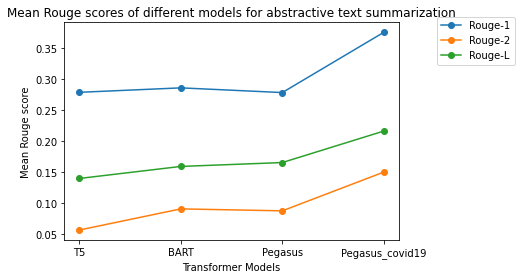

In [12]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
  
# gathering data
x = ["T5","BART","Pegasus","Pegasus_covid19"]
y1 = [np.mean(T5_scores[0]),np.mean(BART_scores[0]),np.mean(Pegasus_scores[0]),np.mean(pegcov_scores[0])]
y2 = [np.mean(T5_scores[1]),np.mean(BART_scores[1]),np.mean(Pegasus_scores[1]),np.mean(pegcov_scores[1])]
y3 = [np.mean(T5_scores[2]),np.mean(BART_scores[2]),np.mean(Pegasus_scores[2]),np.mean(pegcov_scores[2])]
  
# plot lines
plt.plot(x, y1, label = "Rouge-1",marker='o')
plt.plot(x, y2, label = "Rouge-2",marker='o')
plt.plot(x, y3, label = "Rouge-L",marker='o')

#Labelling the axes
plt.xlabel('Transformer Models')
plt.ylabel('Mean Rouge score')
 
# displaying the title and graph
plt.title("Mean Rouge scores of different models for abstractive text summarization")
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()

---------------------------------------------------------------------------
##CONCLUSION:
#####1) Pegasus outperforms BART and T5 models in case of longer input text.
#####2) Finetuning the Pegasus model gave better rouge scores in case of summarizing text of specific subjects like covid-19.